## Reading Data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Cr_24-03-23.csv', sep = ';', decimal = ',')

df.fillna(np.nan, inplace = True)

## Clear the DataFrame

In [3]:
# Remove rows that belong to people who did not complete the survey
df = df[df["Completed"] == "yes"]


df.shape # We have 135 rows and 99 columns

(135, 99)

In [4]:
# Get the column names
colnames = df.columns
colnames

Index(['Campaign code', 'Campaign name', 'Campaign ref', 'Code', 'Completed',
       'Started at', 'Last change', 'Duration', 'BrowserLang', 'IP addr',
       'Country', 'Referer', 'UserAgent', '1: Online footprint',
       '1.1.1a: Have you ever had any personal information online (that you put there or someone else did)?',
       '1.1.1b: Please click on all that apply',
       '1.1.2a: Do you think these pieces of information should have the same levels of protection against unauthorised use?',
       '1.1.2b: Holiday photos', '1.1.2c: Bank information',
       '1.1.2d: Medical information', '1.1.2e: DNA information',
       '1.1.3a: Have you had any negative experiences from your personal information being accessed online?',
       '1.1.3b: Have you had any negative experiences from your personal information being accessed online? (Text)',
       '1.1.4a: Are you familiar with DNA, genetics or genomics?',
       '1.1.4b: I'm familiar through my work, personal interests or family/me

In [5]:
# Remove some columns that aren`t importat for the analysis 
df.drop(columns = colnames[:13], inplace = True)

In [6]:
# Get the column names list
df.columns #The colnames aren`t in a suitable format for pandas

Index(['1: Online footprint',
       '1.1.1a: Have you ever had any personal information online (that you put there or someone else did)?',
       '1.1.1b: Please click on all that apply',
       '1.1.2a: Do you think these pieces of information should have the same levels of protection against unauthorised use?',
       '1.1.2b: Holiday photos', '1.1.2c: Bank information',
       '1.1.2d: Medical information', '1.1.2e: DNA information',
       '1.1.3a: Have you had any negative experiences from your personal information being accessed online?',
       '1.1.3b: Have you had any negative experiences from your personal information being accessed online? (Text)',
       '1.1.4a: Are you familiar with DNA, genetics or genomics?',
       '1.1.4b: I'm familiar through my work, personal interests or family/medical history (details)',
       '1.1.4c: I'm familiar through my work, personal interests or family/medical history (details) (Other)',
       '2: Data access by others',
       '2.2.1a:

In [7]:
# Keep only the "code" as colname
df.columns = df.columns.str.split(':').str[0]

In [8]:
# New colnames
df.columns

Index(['1', '1.1.1a', '1.1.1b', '1.1.2a', '1.1.2b', '1.1.2c', '1.1.2d',
       '1.1.2e', '1.1.3a', '1.1.3b', '1.1.4a', '1.1.4b', '1.1.4c', '2',
       '2.2.1a', '2.2.2a', '2.2.3a', '2.2.4a', '2.2.5a', '2.2.5b', '2.2.6a',
       '3', '3.3.1a', '3.3.1b', '4', '4.4.1a', '4.4.1b', '5', '5.5.1a',
       '5.5.1b', '6', '6.6.1a', '6.6.1b', '6.6.1c', '6.6.1d', '6.6.2a',
       '6.6.2b', '6.6.3a', '6.6.3b', '6.6.4a', '6.6.4b', '6.6.4c', '6.6.4d',
       '6.6.4e', '6.6.4f', '6.6.4g', '6.6.4h', '6.6.4i', '6.6.4j', '6.6.4k',
       '6.6.4l', '6.6.4m', '6.6.5a', '6.6.6a', '6.6.6b', '7', '7.7.1a',
       '7.7.1b', '7.7.2a', '7.7.3a', '7.7.4a', '7.7.4b', '8', '8.8.1a',
       '8.8.1b', '8.8.2a', '8.8.3a', '8.8.3b', '8.8.3c', '8.8.3d', '8.8.3e',
       '8.8.3f', '8.8.3g', '8.8.3h', '8.8.3i', 'D', 'D.D.1a', 'D.D.2a',
       'D.D.3a', 'D.D.4a', 'D.D.5a', 'D.D.5b', 'D.D.6a', 'D.D.6b', 'D.D.7a',
       'D.D.8a'],
      dtype='object')

In [9]:
# Remove rows that don't belong to costa ricans
df = df[df["D.D.4a"] == "Costa Rica"]

df.shape # We have 127 rows and 86 columns

(127, 86)

## Categories and counts by column 

In [10]:
 
# Select only demographic columns
demographics_df  = df[["D.D.1a", "D.D.2a", "D.D.3a", "D.D.4a", "D.D.5a", "D.D.6a", "D.D.7a", "D.D.8a"]] 

for column in demographics_df.columns:
    print(f'** Section: {column} **')
    
    counts = pd.Series(df[column].value_counts(), name = 'Count') # counts
    percentage = pd.Series(counts / counts.sum(), name = 'Percentage') * 100
    
    df_section = pd.concat([counts, percentage], axis=1) # counts and percentage 
    
    print(df_section)
    print('\t')
    print('-------------------')
    print('-------------------')
    print('\t')
    

** Section: D.D.1a **
             Count  Percentage
21-30           40   31.496063
31-40           40   31.496063
41-50           20   15.748031
17-20           13   10.236220
51-60           10    7.874016
61-70            2    1.574803
16 or under      1    0.787402
71-80            1    0.787402
	
-------------------
-------------------
	
** Section: D.D.2a **
                   Count  Percentage
Female                73   57.480315
Male                  51   40.157480
Prefer not to say      3    2.362205
	
-------------------
-------------------
	
** Section: D.D.3a **
                   Count  Percentage
No                    84   66.141732
Yes                   40   31.496063
Prefer not to say      3    2.362205
	
-------------------
-------------------
	
** Section: D.D.4a **
            Count  Percentage
Costa Rica    127       100.0
	
-------------------
-------------------
	
** Section: D.D.5a **
                                                    Count  Percentage
Completed

## Age plot

In [11]:
# Age counts 
column_data = df.loc[:, 'D.D.1a'].value_counts()

In [12]:
order_list = ['16 or under', '17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

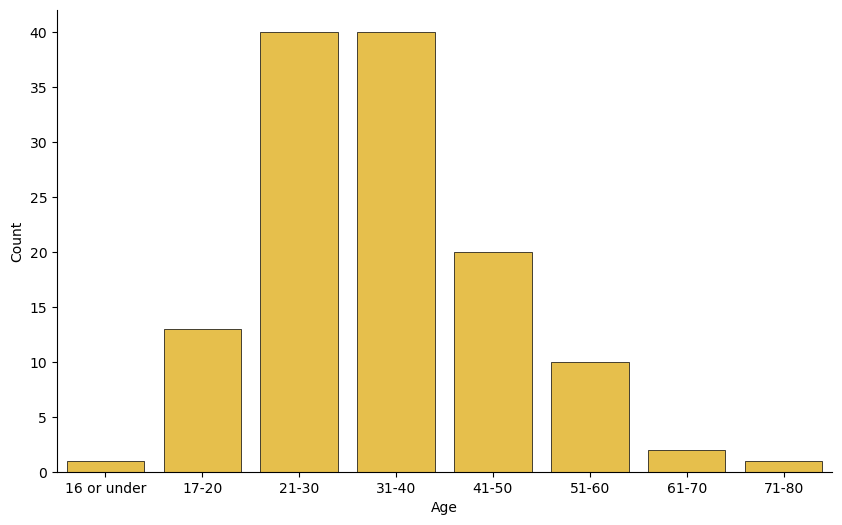

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x=column_data.index, y=column_data.values, 
            order = order_list, color = '#ffcc33', edgecolor='black',
            linewidth=0.5)

sns.despine() #remove right and top border

plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## Education plot

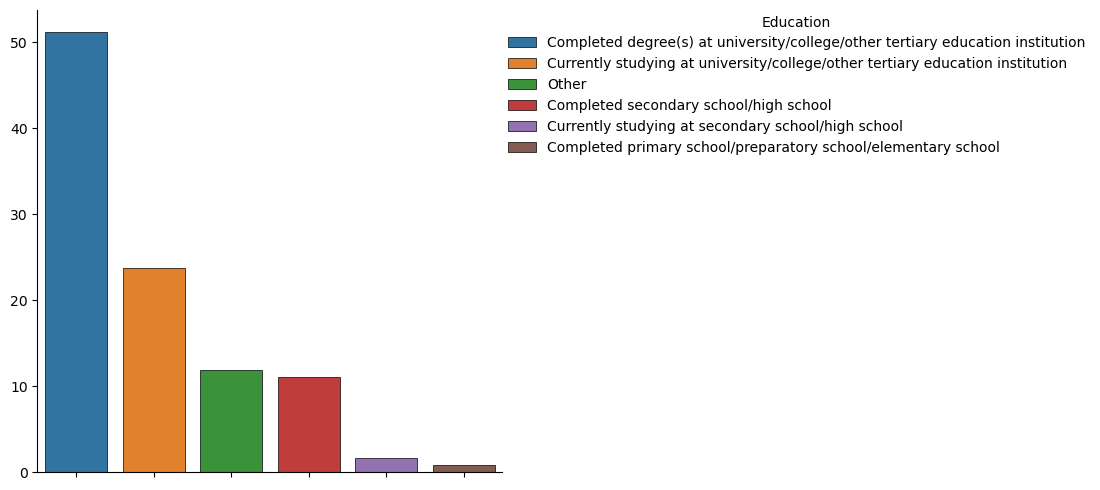

In [14]:
# Education counts
education_perc = df['D.D.5a'].value_counts()
education_perc = (education_perc / education_perc.sum())*100

# Set the size of the plot
plt.figure(figsize=(6, 6))

sns.barplot(x = education_perc.index, y = education_perc.values, hue = education_perc.index,
            width = 0.8, dodge=False, edgecolor='black',
            linewidth=0.5)

plt.gca().set_xticklabels([])
sns.despine() #remove right and top border

plt.legend(frameon = False, title='Education', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)



plt.show()